In [601]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [535]:
directory_path = "Freiwald_Tsao_faceviews_AM_data_csv"
file_list = os.listdir(directory_path)
data_list = []
count = 0
for file_name in file_list:
    file_path = os.path.join(directory_path, file_name)
    if ".csv" in file_path:
        data_temp = pd.read_csv(file_path)
        data_list.append(data_temp)
        count += 1
    if count == 1:
        break
data = pd.concat(data_list)
print(data.shape)
data.head()

(1600, 806)


,site_info.monkey,site_info.region,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,...,time.791_792,time.792_793,time.793_794,time.794_795,time.795_796,time.796_797,time.797_798,time.798_799,time.799_800,time.800_801
0,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [536]:
data = data.iloc[:, :405] 
data = data.drop(['site_info.region'], axis=1)

In [537]:
time_data = data.iloc[:, 5:]
time_cols = list(data.columns)[5:]

data['activations_0_200'] = data.iloc[:, 5:205].sum(axis=1)
data['activations_200_400'] = data.iloc[:, 205:405].sum(axis=1)
data['total_activations'] = data.iloc[:, 5:405].sum(axis=1)

first_activations = []
for i, row in data.iterrows():
    first_act_col = None
    for col in time_cols:
        if row[col] == 1:
            first_act_col = col
            break
        else:
            first_act_col = 'None'
    first_activations.append(first_act_col)
data['first_activation_time_frame'] = first_activations

data['mean_activations'] = data['total_activations'] / len(time_cols)
data.head()

,site_info.monkey,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,time.5_6,...,time.395_396,time.396_397,time.397_398,time.398_399,time.399_400,activations_0_200,activations_200_400,total_activations,first_activation_time_frame,mean_activations
0,bert,1,1,front,front 1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,None,0.000000
1,bert,1,1,front,front 1,0,0,0,0,0,...,0,0,0,0,0,1,1,2,time.157_158,0.005013
2,bert,1,1,front,front 1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,time.369_370,0.002506
3,bert,1,1,front,front 1,0,0,0,0,0,...,0,0,0,0,0,1,1,2,time.165_166,0.005013
4,bert,1,1,front,front 1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,None,0.000000


In [538]:
label_encoder = LabelEncoder()
data = data.apply(label_encoder.fit_transform)
data.head()

,site_info.monkey,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,time.5_6,...,time.395_396,time.396_397,time.397_398,time.398_399,time.399_400,activations_0_200,activations_200_400,total_activations,first_activation_time_frame,mean_activations
0,0,0,0,2,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,50,0,0,0,0,0,...,0,0,0,0,0,1,1,2,59,2
2,0,0,0,2,50,0,0,0,0,0,...,0,0,0,0,0,0,1,1,215,1
3,0,0,0,2,50,0,0,0,0,0,...,0,0,0,0,0,1,1,2,68,2
4,0,0,0,2,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [539]:
y = data['labels.person']
X = data.drop(['labels.person'], axis=1)

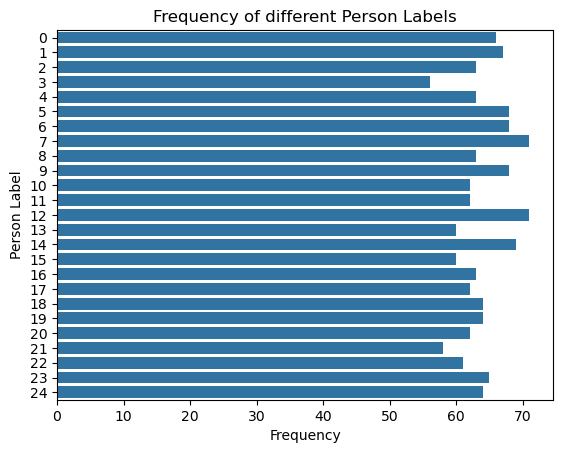

In [540]:
sns.countplot(y=y)
plt.title('Frequency of different Person Labels')
plt.xlabel('Frequency')
plt.ylabel('Person Label')
plt.show()

In [541]:
def train_test(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

    results = {}
    for i, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results[i] = acc

    return results

In [542]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {'Logistic Regression': LogisticRegression(max_iter=1000), 'KNN': KNeighborsClassifier(n_neighbors=1),
          'Random Forest': RandomForestClassifier(random_state=10),'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=10,
                                                                                                 algorithm="SAMME")}

results = train_test(models, X, y)
print(f'Accuracies (all features) using different models:\n {results}')

Accuracies (all features) using different models:
 {'Logistic Regression': 0.06875, 'KNN': 0.709375, 'Random Forest': 0.690625, 'AdaBoost': 0.10625}


In [543]:
def perform_KFold(model, X_values, y_values):
    best_acc = -float('inf')
    optimal_k = None  
    acc_lst = []
    
    for i in range(2, 15):  
        kf = KFold(n_splits=i, shuffle=True, random_state=10)
        accs = []
        for train_idx, test_idx in kf.split(X_values):
            X_train, X_test = X_values[train_idx], X_values[test_idx]
            y_train, y_test = y_values[train_idx], y_values[test_idx]
            
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)
            
            acc = accuracy_score(y_test, y_hat)
            accs.append(acc)
            
        avg_acc = np.mean(accs)
        acc_lst.append(avg_acc)
        
        if avg_acc > best_acc:
            best_acc = avg_acc
            optimal_k = i

    plt.plot(range(2, 15), acc_lst, marker='o')
    plt.xlabel('Fold (k)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Folds')
    plt.grid(True)
    plt.show()

    return best_acc, optimal_k


-----------Using Logistic Regression for KFold----------


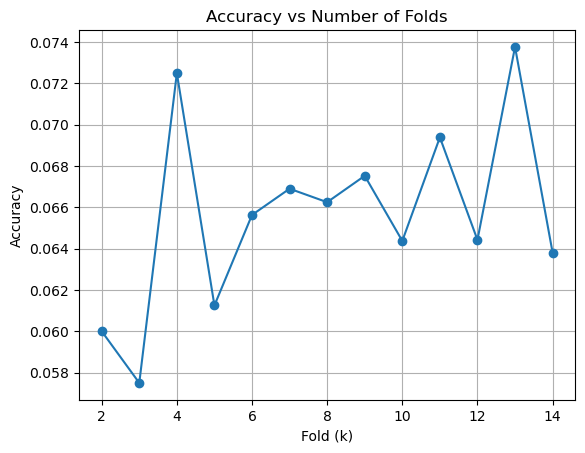


-----------Using KNN for KFold----------


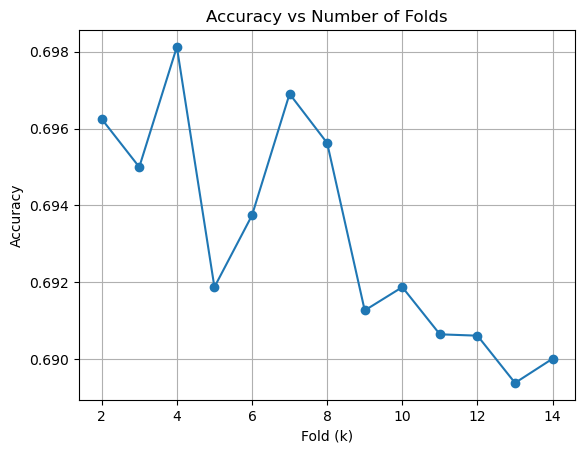


-----------Using Random Forest for KFold----------


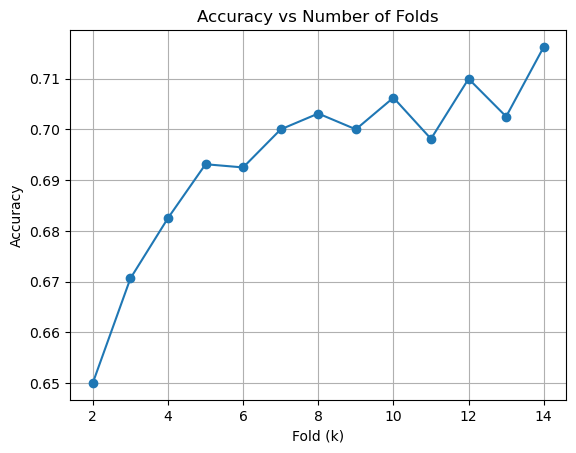


-----------Using AdaBoost for KFold----------


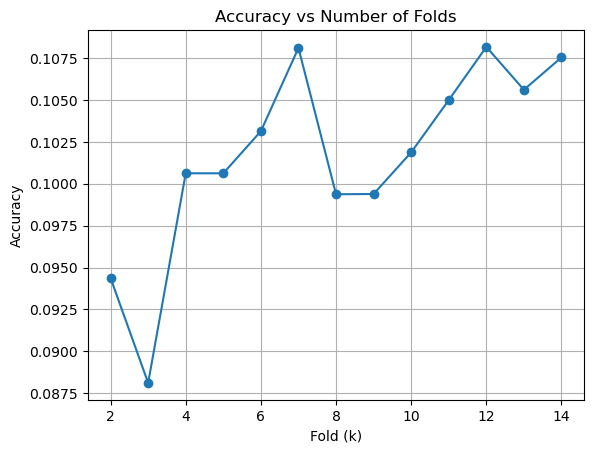

In [544]:
results_cv = {}
for i, model in models.items():
    print(f'\n-----------Using {i} for KFold----------')
    best_acc, optimal_k = perform_KFold(model, X_scaled, y.values)
    results_cv[i] = (best_acc, optimal_k)

In [545]:
print(f' Best Accuracy and k values of models: results:\n {results_cv}')

 Best Accuracy and k values of models: results:
 {'Logistic Regression': (0.07377090520284856, 13), 'KNN': (0.6981249999999999, 4), 'Random Forest': (0.7162580363953361, 14), 'AdaBoost': (0.10816687240489282, 12)}


In [546]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reduced_scaled = scaler.fit_transform(X_reduced)

pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X_scaled)
print(f'Features reduced from {X.shape[1]} to {X_pca.shape[1]}')

results_pca = train_test(models, X_pca, y)
print(f'Accuracies (PCA) using different models:\n {results_pca}')

Features reduced from 408 to 10
Accuracies (PCA) using different models:
 {'Logistic Regression': 0.06875, 'KNN': 0.709375, 'Random Forest': 0.690625, 'AdaBoost': 0.10625}



-----------Using Logistic Regression for KFold----------


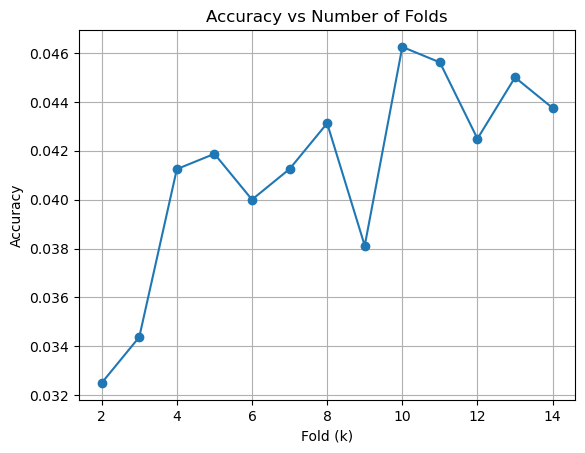


-----------Using KNN for KFold----------


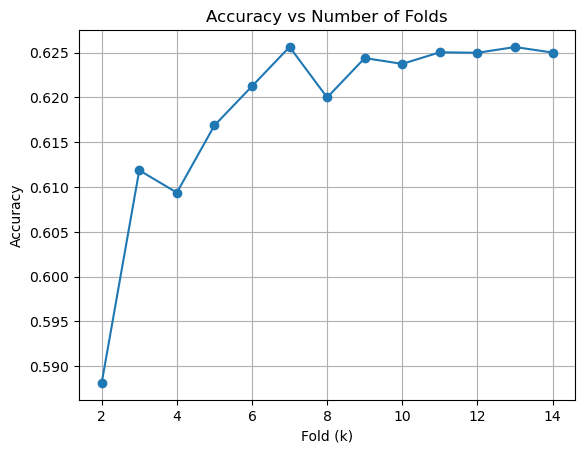


-----------Using Random Forest for KFold----------


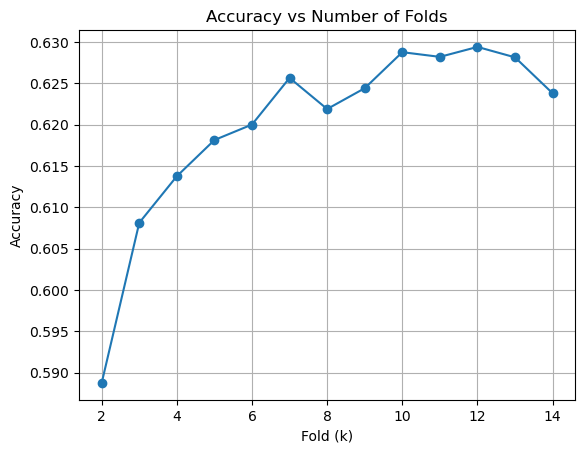


-----------Using AdaBoost for KFold----------


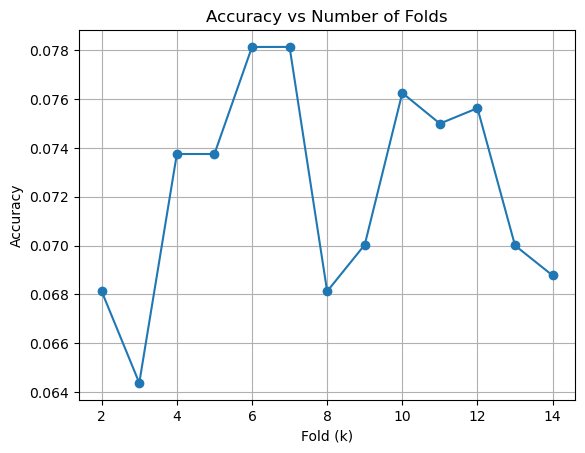

In [547]:
results_pca_cv = {}
for i, model in models.items():
    print(f'\n-----------Using {i} for KFold----------')
    best_acc, optimal_k = perform_KFold(model, X_pca, y.values)
    results_pca_cv[i] = (best_acc, optimal_k)

In [548]:
print(f' Best Accuracy and k values of models: results:\n {results_pca_cv}')

 Best Accuracy and k values of models: results:
 {'Logistic Regression': (0.04625, 10), 'KNN': (0.6256443510523032, 7), 'Random Forest': (0.6293859649122806, 12), 'AdaBoost': (0.07813474734872115, 7)}


In [613]:
param_grid = {'n_estimators': [10, 30, 50, 100],
              # 'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [None, 10, 20, 30, 50],
              # 'max_features': ['sqrt', 'log2', None], 
              # 'min_impurity_decrease': [0.0, 0.01, 0.1, 0.5, 0.9]
             }

grid = GridSearchCV(models['Random Forest'], param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

print(f'Best params = {grid.best_params_}')

Best params = {'max_depth': None, 'n_estimators': 100}


In [ ]:
## Need to add Train and Test code for best model ### 

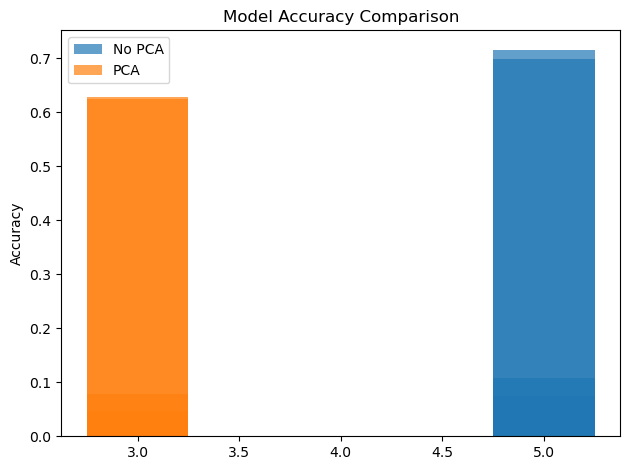

In [599]:
##### NEED TO FIX ######

model_names = []
no_pca_accs = []
pca_accs = []

for i, res in results_cv.items():
    model_names.append(i)
    no_pca_accs.append(res[0])

for i, res in results_pca_cv.items():
    pca_accs.append(res[0])

plt.bar(len(model_names, no_pca_accs, width=0.5, label='No PCA', alpha=0.7)

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.tight_layout()
plt.show()